**Problem Definition**

Convert the Sign Alphabet to Text

**Data**

[Dataset](https://www.kaggle.com/datasets/datamunge/sign-language-mnist)

1. No cases for the letters J & Z (Reason: J & Z require motion)
2. GrayScale Images
3. Pixel Values Range From 0 to 255
4. Each image contains 784 Pixels


**Evaluation**

Accuracy

**Modelling**

CNN

# Initial End-to-End Workflow (Start)

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing required libraries

from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from keras.utils import plot_model

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

2025-01-14 05:52:43.479211: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-14 05:52:47.559728: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-14 05:52:49.663017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736833972.532491     940 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736833973.245274     940 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-14 05:52:59.003652: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
# loading the training data (X+y)
train_df = pd.read_csv('data/alphabet/sign_mnist_train.csv')

In [4]:
train_df = train_df.sample(frac=1, random_state=42) # Shuffiling the entire dataset

In [5]:
X, y = train_df.drop('label', axis=1), train_df['label'] # Split the dataset into X, y

In [6]:
X.shape, y.shape

((27455, 784), (27455,))

In [7]:
np.unique(X.dtypes), y.dtype

(array([dtype('int64')], dtype=object), dtype('int64'))

In [8]:
label_binarizer = LabelBinarizer() # Binarize labels in a one-vs-all fashion (return one-hot encoded vectors)
y = label_binarizer.fit_transform(y)

In [9]:
X = X/255.0 # Normalizing the training data and converting the data type to float

In [10]:
np.unique(X.dtypes)

array([dtype('float64')], dtype=object)

In [11]:
# Converting the 1-D array of 784 pixels to (28, 28, 1) Image
# (28, 28) represents the spatial dimensions of the image & 1 specifies that the image is grayscale
X = tf.reshape(X, [-1, 28, 28, 1])

2025-01-14 05:53:17.066098: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-01-14 05:53:17.167446: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172197760 exceeds 10% of free system memory.


In [12]:
X.shape, y.shape

(TensorShape([27455, 28, 28, 1]), (27455, 24))

In [13]:
# Generating a validation set

X_train, X_valid = X[:25000], X[25000:]
y_train, y_valid = y[:25000], y[25000:]

In [14]:
X_train[0].dtype

tf.float64

In [15]:
X_train[0].shape

TensorShape([28, 28, 1])

(<matplotlib.image.AxesImage at 0x7228629c87d0>,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1]))

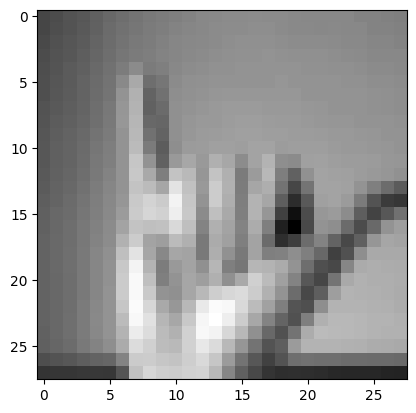

In [16]:
plt.imshow(X[0], cmap='gray'), y[0]

In [17]:
# Defining the CNN

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,704 (1.56 MB)

 Trainable params: 407,704 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# save_best_cb = keras.callbacks.ModelCheckpoint('models/initial-end-to-end', save_best_only=True) # Saves the best model so far
save_best_cb = keras.callbacks.ModelCheckpoint('models/initial-end-to-end.keras', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5) # Interupts training when there is no progress

In [21]:
# The model is same is 'models/initial-end-to-end'
# The history object is 'models/initial-end-to-end-history'

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20


2025-01-14 05:53:18.422220: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78400000 exceeds 10% of free system memory.


  3/782 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.0295 - loss: 3.1935  

2025-01-14 05:53:20.376235: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22579200 exceeds 10% of free system memory.
2025-01-14 05:53:20.376298: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22579200 exceeds 10% of free system memory.
2025-01-14 05:53:20.435458: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22579200 exceeds 10% of free system memory.


782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.4542 - loss: 1.7736 - val_accuracy: 0.9666 - val_loss: 0.0858
Epoch 2/20
436/782 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.9889 - loss: 0.0381

KeyboardInterrupt: 

In [25]:
history.history # Contains the training related information for each epoch

{'accuracy': [0.7414000034332275,
  0.9934800267219543,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.8330546617507935,
  0.02612423524260521,
  0.0007260236889123917,
  0.00014736676530446857,
  7.815320714144036e-05,
  4.504321623244323e-05,
  2.8184111215523444e-05,
  1.7918382582138292e-05,
  1.163912020274438e-05,
  7.621340046171099e-06,
  4.970009740645764e-06,
  3.230861693737097e-06,
  2.1112903141329298e-06,
  1.3888211469748057e-06,
  9.054148222276126e-07,
  6.158776386655518e-07,
  3.8768629906371643e-07,
  2.5743418063939316e-07,
  1.5917758844352647e-07,
  1.0861387522709265e-07],
 'val_accuracy': [0.9926680326461792,
  0.999592661857605,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.03317105770111084,
  0.005996118765324354,
  0.00022503393120132387,
  0.00010493955051060766,
  6.223

In [29]:
# Saving the history object

with open('models/intial-end-to-end-history', 'wb') as history_file:
    pickle.dump(history.history, history_file)

In [22]:
h = np.load('models/intial-end-to-end-history', allow_pickle=True)
h

{'accuracy': [0.7414000034332275,
  0.9934800267219543,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.8330546617507935,
  0.02612423524260521,
  0.0007260236889123917,
  0.00014736676530446857,
  7.815320714144036e-05,
  4.504321623244323e-05,
  2.8184111215523444e-05,
  1.7918382582138292e-05,
  1.163912020274438e-05,
  7.621340046171099e-06,
  4.970009740645764e-06,
  3.230861693737097e-06,
  2.1112903141329298e-06,
  1.3888211469748057e-06,
  9.054148222276126e-07,
  6.158776386655518e-07,
  3.8768629906371643e-07,
  2.5743418063939316e-07,
  1.5917758844352647e-07,
  1.0861387522709265e-07],
 'val_accuracy': [0.9926680326461792,
  0.999592661857605,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.03317105770111084,
  0.005996118765324354,
  0.00022503393120132387,
  0.00010493955051060766,
  6.223

In [23]:
best_model = keras.models.load_model('models/initial-end-to-end.keras') # Model with best set of parameters not necessarily the model at the last epoch of training

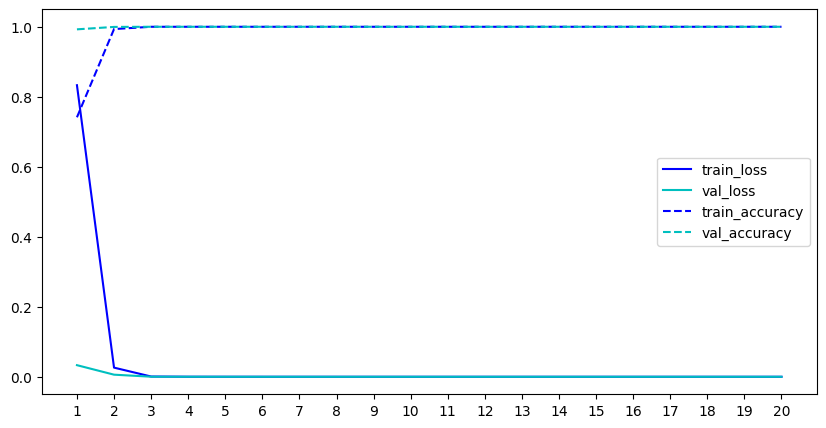

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])
ax.plot(range(1, n_epochs+1), h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='c', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='c', label='val_accuracy', linestyle='--')
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

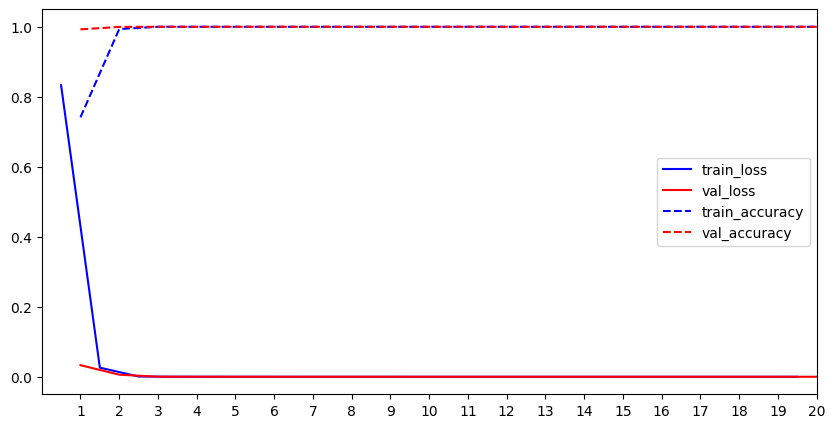

In [25]:
# Training Loss Correction

fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])

# Shift training loss by 0.5 as training loss is measured during the epoch and validation loss is measured after the epoch

x_loss = np.arange(n_epochs+1)-0.5
ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
ax.set_xlim(0, n_epochs)
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

In [26]:
# Defining a function the get the training and validation plots representing the accuracy and loss at each epoch

def get_train_val_plots(h, yticks=None, figsize=(10, 5)):
    # h: Any dictionary like the history.history
    
    fig, ax = plt.subplots(figsize=figsize)
    n_epochs = len(h['loss'])
    x_loss = np.arange(n_epochs+1)-0.5
    
    ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
    ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
    ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
    ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
    ax.set_xlim(0, n_epochs)
    ax.set_xticks(range(1, n_epochs+1))
    if yticks is not None:
        ax.set_yticks(yticks)
    ax.legend()

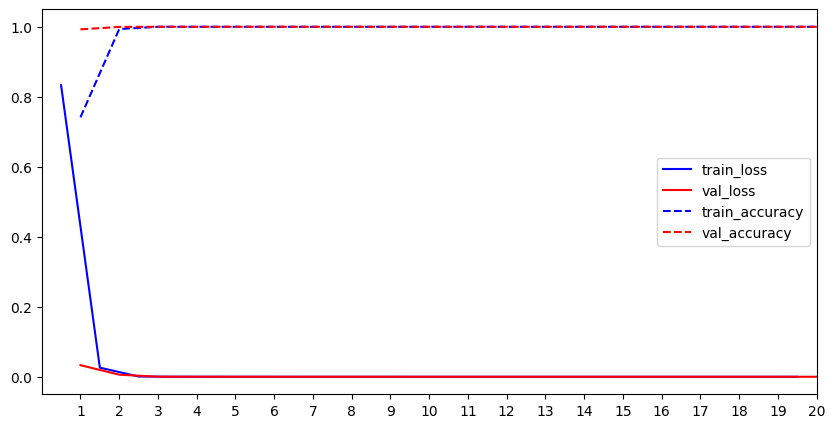

In [27]:
get_train_val_plots(h)

In [28]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [35]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [36]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [37]:
y_test = label_binarizer.transform(y_test)

In [38]:
best_model.evaluate(X_test, y_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8534 - loss: 85.7507


[85.66358947753906, 0.8548521995544434]

Accuracy: 94%

In [39]:
# Preprocesses the input and evaluates the model
def evaluate_model(model, X_test, y_test, label_binarizer):
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    y_test_labels = label_binarizer.transform(y_test)
    results = model.evaluate(X_test_reshape, y_test_labels)
    print(f'Loss: {results[0]:.3f} Accuracy: {results[1]:.3f}')

In [40]:
results = evaluate_model(best_model, test_df.drop('label', axis=1), test_df['label'], label_binarizer)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8534 - loss: 85.7507
Loss: 85.664 Accuracy: 0.855


## Converting Images to a Sentence

In [41]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [42]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [43]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [44]:
d = {chr(ord('a') + i):i for i in range(26)}
d_rev = {i:chr(ord('a') + i) for i in range(26)}
d[' '] = d_rev[' '] = ' '

In [45]:
sentence = 'classic'

for i in sentence:
    print(d[i], end=' ')

2 11 0 18 18 8 2 

In [46]:
best_model.predict(tf.reshape(X_test[0], [-1, 28, 28, 1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [47]:
images_taken = []
result = ''

for i in sentence:
    if i != ' ':
        char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
        images_taken.append(char_index)
        y_pred = best_model.predict(tf.reshape(X_test[char_index], [-1, 28, 28, 1]))
        result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
    else:
        result += ' '
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
classic


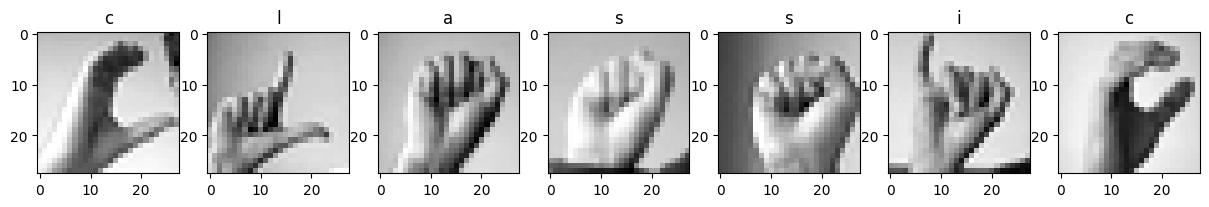

In [48]:
# Visualizing the test images
images_taken_dup = list(reversed(images_taken))
for word in sentence.split():
    fig, ax = plt.subplots(1, len(word), figsize=(15, 15))
    for i in range(len(word)):
        ax[i].imshow(X_test[images_taken_dup.pop()], cmap='gray')
        ax[i].set_title(word[i])

In [49]:
def test_on_sentence(model, sentence, X_test, y_test, label_binarizer, figsize=(20, 20)):
    # Random images are taken from X_test along with the corresponding labels in y_test
    # based on the letters in the sentence.
    # These images are fed to the model and its output is printed
    
    sentence = sentence.lower()
    
    d = {chr(ord('a') + i):i for i in range(26)}
    d_rev = {i:chr(ord('a') + i) for i in range(26)}
    d[' '] = d_rev[' '] = ' '
    
    
    images_taken = []
    result = ''
    
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    

    for i in sentence:
        if i != ' ':
            char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
            images_taken.append(char_index)
            y_pred = model.predict(tf.reshape(X_test_reshape[char_index], [1, 28, 28, 1]))
            result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
        else:
            result += ' '
            
    print(f'The actual sentence is "{sentence}"')
    print(f'The predicted sentence is "{result}"')
        
    images_taken.reverse()
    for word in sentence.split():
        fig, ax = plt.subplots(1, len(word), figsize=figsize)
        for i in range(len(word)):
            ax[i].imshow(X_test_reshape[images_taken.pop()], cmap='gray')
            ax[i].set_title(word[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The actual sentence is "classic"
The predicted sentence is "classic"


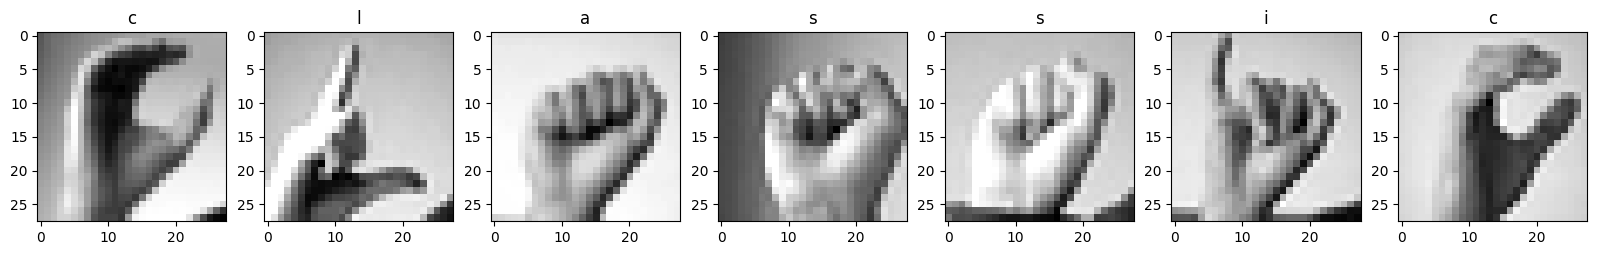

In [50]:
test_on_sentence(best_model, 'classic', test_df.drop('label', axis=1), test_df['label'], label_binarizer)

In [51]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 31.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 36.4 MB/s eta 0:00:0000:01
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Note: you may need to restart the kernel to use updated packages.


In [53]:
import gradio as gr
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image

# Load the trained model
model = load_model('models/initial-end-to-end.keras')

def predict_sign(image):
    """
    Preprocess the input image and predict the sign.
    
    Args:
        image (PIL.Image): Input image uploaded by the user.

    Returns:
        str: Predicted sign label.
    """
    # Preprocess the image
    image = image.convert('L')  # Convert to grayscale
    image = image.resize((28, 28))  # Resize to 28x28
    image_array = np.array(image) / 255.0  # Normalize pixel values
    image_array = image_array.reshape(1, 28, 28, 1)  # Add batch and channel dimensions

    # Make prediction
    prediction = model.predict(image_array)
    predicted_label = np.argmax(prediction)  # Get the class with the highest probability

    return chr(predicted_label + ord('A'))  # Convert numeric label to character

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_sign,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Sign Language Detection",
    description="Upload an image of a hand sign to predict the corresponding letter."
)

# Launch the interface
if __name__ == "__main__":
    interface.launch(share = True)


* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://860f394d4df7294da5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [54]:
def save_alphabet_images(output_dir="JaydipDamor/Sign-Language-Recognition/data/alphabet/Sample_Images"):
    """
    Generate and save one image for each alphabet using the model.

    Args:
        output_dir (str): Directory to save the images.
    """
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Generate and save images for each alphabet (A-Z, excluding J & Z)
    for label in range(26):
        if chr(label + ord('A')) in ['J', 'Z']:
            continue

        # Create a random input image
        random_image = np.random.rand(28, 28).astype(np.float32)
        random_image = random_image.reshape(1, 28, 28, 1)

        # Get the model's prediction to confirm the label
        prediction = model.predict(random_image)
        predicted_label = np.argmax(prediction)

        if predicted_label == label:
            # Save the image if the prediction matches the label
            image_path = os.path.join(output_dir, f"{chr(label + ord('A'))}.png")
            plt.imsave(image_path, random_image[0, :, :, 0], cmap='gray')

    print(f"Images saved in directory: {output_dir}")

In [57]:
save_alphabet_images(output_dir="JaydipDamor/Sign-Language-Recognition/data/alphabet/Sample_Images")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Images saved in directory: JaydipDamor/Sign-Language-Recognition/data/alphabet/Sample_Im

In [56]:
import os